In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
zero = np.zeros((100,100))

In [4]:
# df = pd.read_csv('csv_results/result_16.csv')
# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv')
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv')
df = pd.read_csv('pretrained_csv_results/result_1.csv')

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').head(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').head(33)
# df = pd.read_csv('csv_results/result_18.csv').sort_values(by='seed').head(33)

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').tail(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').tail(33)
# df = pd.read_csv('csv_results/result_1.csv').sort_values(by='seed').tail(33)
df

,seed,Test,True,ARMA,ARMA_Order,ARMA_Train_loss,ARMA_Valid_loss,Moirai
0,3,"[2.0410353812780957, 2.2545601511448243, 2.395...","[1.0769925434126555, 1.502539109571768, 1.5032...","[1.0760187011795812, 1.4800360341390988, 1.480...","(1, 0, 1)",0.336210,0.973995,"[1.4993583, 2.5016541, 2.2897315, 2.8959317, 0..."
1,1,"[-1.1587411739246831, -1.632320635433263, -1.2...","[-0.40437735099775673, -0.9565524984258048, -1...","[-0.43159632424903127, -0.9525792196191856, -1...","(1, 0, 1)",0.317951,0.786580,"[-1.6303055, -0.59459937, -0.6711088, -0.94232..."
2,2,"[-1.57506491663089, -0.39102003378052896, 0.84...","[-0.5880622323684788, -1.2810338004466508, 0.2...","[-0.5985971130650789, -1.308747438799615, 0.24...","(1, 0, 1)",0.340212,0.808891,"[-0.31575084, -3.8945694, -0.16845977, -0.5611..."
3,10,"[-0.714749315592119, -0.9799594569012458, -0.9...","[-0.971740518062925, -0.22887905656065644, -0....","[-0.9116940203490889, -0.29148144221742267, -0...","(2, 0, 0)",0.349486,0.765211,"[-1.0061843, 0.25548857, -0.53740644, -0.98830..."
4,12,"[0.9541177075493763, 0.7682197619218714, 0.861...","[0.5737589929074907, 0.667238211095631, 0.4346...","[0.6056309180502863, 0.6876459448992783, 0.451...","(1, 0, 1)",0.342009,0.778413,"[0.7325136, 1.1216457, 0.5469024, 1.0351691, 0..."
...,...,...,...,...,...,...,...,...
95,82,"[-0.21744899281940194, -0.20509258002889222, -...","[0.00028218870295909637, -0.2175900871708815, ...","[-0.0752755471527996, -0.31371160664243714, -0...","(4, 0, 0)",0.329466,0.796570,"[0.01052773, -1.3542172, -0.12588012, 0.156671..."
96,96,"[-0.4074204216722431, 0.16273905224560842, 0.3...","[0.004365431830552047, -0.40960313758751915, 0...","[0.031096698904408804, -0.4707911133289339, 0....","(4, 0, 0)",0.325025,0.899666,"[0.37735063, -0.23655014, 0.15875871, 0.374665..."
97,68,"[1.5342337458692215, 1.9805541218516929, 1.443...","[0.5716760943139325, 1.248395698712255, 1.3563...","[0.5511838561722561, 1.25459895930164, 1.36379...","(1, 0, 1)",0.316192,0.766080,"[0.19416794, 2.1629186, 1.6506441, 1.6811991, ..."
98,97,"[0.5937805596087248, 0.8444166282756932, 1.561...","[0.2476342331692206, 0.46996344302411447, 0.60...","[0.25869722482401153, 0.4482674497821726, 0.57...","(4, 0, 0)",0.319379,0.907014,"[-0.03652039, 0.39319798, 0.89016217, 2.228388..."


In [5]:
# ar_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# ar_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [5]:
# zero_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')
# zero_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')

In [7]:
moirai_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['Moirai'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
moirai_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Moirai'].apply(ast.literal_eval).to_list()),multioutput='raw_values')


In [ ]:
# informer_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# informer_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

# rnn_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# rnn_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [8]:


# Plotting the array
plt.figure(figsize=(100, 100))
# plt.plot(zero_mse,label = 'Zero', marker='o')
# plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(moirai_mse,label = 'Moirai', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of test MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


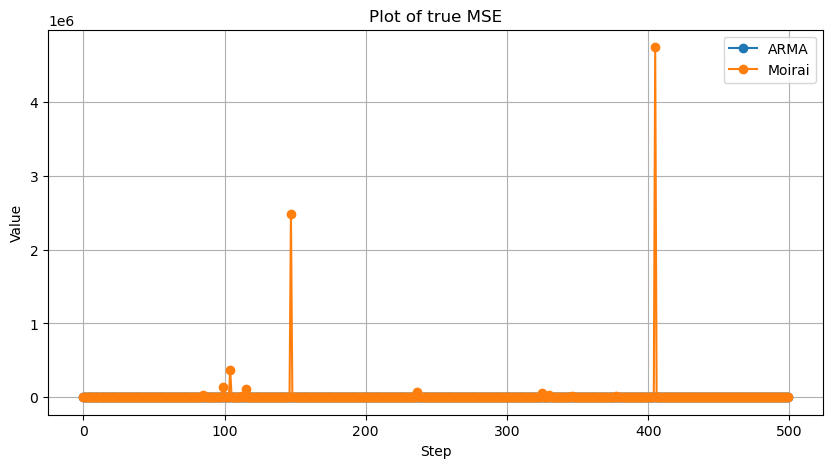

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
# plt.plot(zero_mse_true,label = 'Zero', marker='o')
# plt.plot(rnn_mse_true,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(informer_mse_true,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.plot(moirai_mse_true,label = 'Moirai', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse_true,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()
